In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

### Обучим нейронную сеть для задачи регрессии:

Возьмем функцию в качестве таргета: 
y = 2\*\*x \*sin(2\*\*-x)
Получиv метрику не хуже 0.03

0.026002608239650726


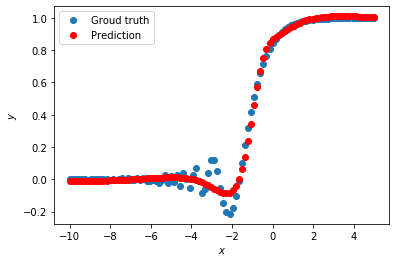

In [8]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
      super(RegressionNet, self).__init__()
      self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
      self.act1 = torch.nn.Tanh()
      self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
    
    def forward(self, x):
      x = self.fc1(x)
      x = self.act1(x)
      x = self.fc2(x)
      return x

def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

net = RegressionNet(50)

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

def loss(pred, target):
    squares = (pred-target)**2
    return squares.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()
  
predict(net, x_validation, y_validation)

print(metric(net.forward(x_validation), y_validation).item())